In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import defaultdict

In [2]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14

In [3]:
kategorie_mapping = {
    3: 1,
    4: 5,
    5: 1,
    6: 7,
    7: 1,
    8: 5,
    9: 2,
    10: 3,
    11: 6,
    12: 4,
    13: 4,
    14: 7,
    15: 4,
    16: 3,
    17: 2,
    18: 3,
    19: 7,
    20: 2,
    21: 6,
    22: 5
}

kategorie_farben = {
    1: (255, 0, 0),
    2: (255, 192, 0),
    3: (146, 208, 80),
    4: (0, 176, 80),
    5: (0, 176, 240),
    6: (0, 112, 192),
    7: (112, 48, 160),
}

rgb_fragen = np.array([kategorie_farben[kategorie] for frage, kategorie in kategorie_mapping.items()]) / 255

In [4]:
# def alterskategorie(alter):
#     if float(alter) is np.nan:
#         return np.nan
#     if alter <= 25:
#         return "18-25"
#     elif alter < 36:
#         return "26-35"
#     elif alter < 46:
#         return "36-45"
#     elif alter < 56:
#         return "46-55"
#     elif alter < 66:
#         return "56-65"
#     elif alter < 75:
#         return "66-75"
#     return np.nan

# # df["Altersgruppe"] = df.Alter.apply(alterskategorie)
# # df.to_csv("all_data_v2.csv", index=False)

In [5]:
df = pd.read_csv("survey_data.csv")

# Abbildung 22: Verteilung Teilnehmende nach alter und Gender

In [6]:
df.rename({"Geschlecht": "Gender"}, axis=1, inplace=True)

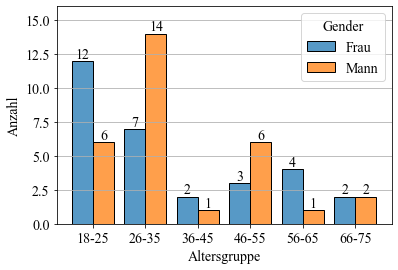

In [7]:
ax = sns.histplot(data=df.groupby(["ID", "Altersgruppe", "Gender"], as_index=False).mean().sort_values("Altersgruppe"),
             x="Altersgruppe", hue="Gender", multiple="dodge", shrink=.8)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0, 16)
plt.grid(axis="y")
plt.ylabel("Anzahl")
plt.savefig("plots/abbildung_22.png", dpi=320)

# Abbildung 23: Durchschnittliche Bewertung der Fragen

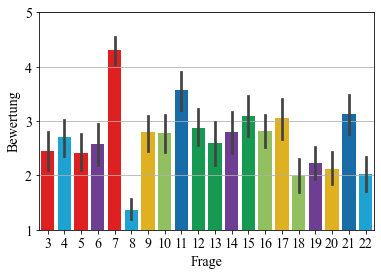

In [8]:
sns.barplot(data=df, x="Frage", y="Antwort", palette=rgb_fragen)
plt.ylim(1, 5)
plt.ylabel("Bewertung")
# plt.yticks(range(1, 6), range(1, 6))
plt.grid(axis="y")
plt.savefig("plots/abbildung_23.png", dpi=320)

# Abbildung 24: Bewertung der Fragen nach Gender

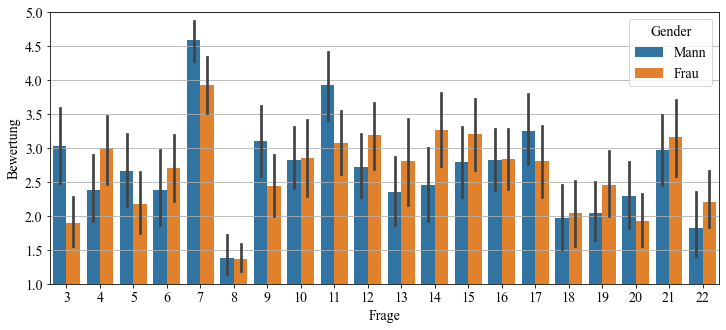

In [9]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x="Frage", y="Antwort", hue="Gender")
plt.ylim(1, 5)
plt.ylabel("Bewertung")
# plt.yticks(range(1, 6), range(1, 6))
plt.grid(axis="y")
plt.savefig("plots/abbildung_24.png", dpi=320)

# Abbildng 25: Differenzen zwischen geschlechtern

In [10]:
grouped = df.groupby(by=["Gender", "Frage"], as_index=False).mean()
frage = grouped[grouped.Gender == "Frau"].Frage.to_numpy()

mann = grouped[grouped.Gender == "Frau"].Antwort.to_numpy()
frau = grouped[grouped.Gender == "Mann"].Antwort.to_numpy()
diff = mann - frau

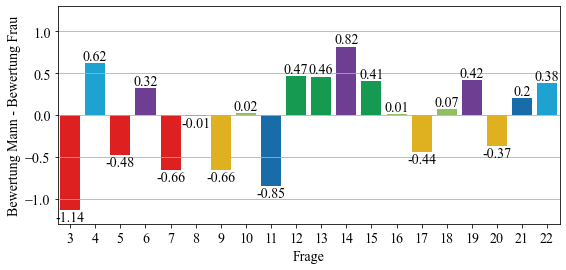

In [11]:
plt.figure(figsize=(9, 4))
ax = sns.barplot(x=frage, y=np.round(diff, 2), color="gray", palette=rgb_fragen)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(-1.3, 1.3)
plt.ylabel("Bewertung Mann - Bewertung Frau")
plt.xlabel("Frage")
plt.grid(axis="y")
plt.savefig("plots/abbildung_25.png", dpi=320)

# Abbildung 26

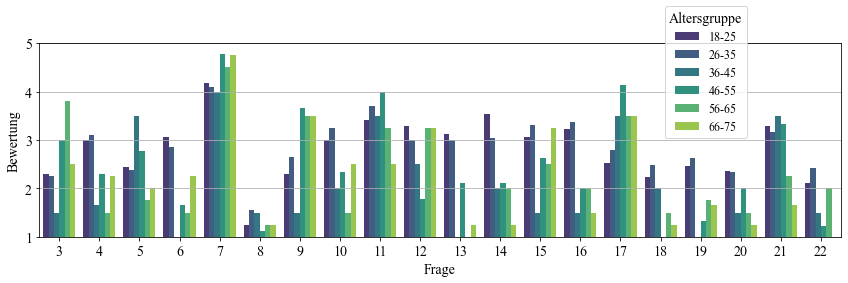

In [12]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(data=df, x="Frage", y="Antwort", hue="Altersgruppe", palette="viridis", ci=None,)
plt.ylim(1, 5)
plt.ylabel("Bewertung")
plt.legend(title="Altersgruppe", loc=(0.78, 0.51), prop={'size': 12})
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("plots/abbildung_26.png", dpi=320)

# Abbildung 27

In [13]:
result = defaultdict(list)

grouped = df.groupby(["Frage", "Altersgruppe"], as_index=False).mean()
for _, row in grouped.iterrows():
    
    rest = grouped[(grouped.Frage == row.Frage) & (grouped.Altersgruppe != row.Altersgruppe)]
    
    rest_mean = rest.Antwort.mean()
    
    result["Frage"].append(int(row.Frage))
    result["Altersgruppe"].append(row.Altersgruppe)
    result["Kategorie"].append(int(row.Kategorie))
    result["Antwort"].append(row.Antwort)
    result["RestMean"].append(row.Antwort - rest_mean)
    

result = pd.DataFrame(result)

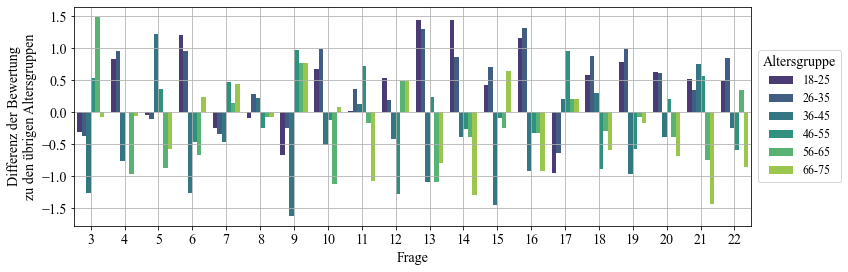

In [15]:
plt.figure(figsize=(12, 4))
sns.barplot(data=result, x="Frage", y="RestMean", hue="Altersgruppe", palette="viridis")
plt.ylabel("Differenz der Bewertung\nzu den übrigen Altersgruppen")
plt.legend(loc=(1.01, 0.2), title="Altersgruppe", prop={'size': 12})
plt.grid()
plt.tight_layout()
plt.savefig("plots/abbildung_27.png", dpi=320)

# Abbildung 28

In [26]:
result = defaultdict(list)

grouped = df.groupby(["Kategorie", "FrageNummer"], as_index=False).mean()
for _, row in grouped.iterrows():
    
    rest = grouped[(grouped.Kategorie == row.Kategorie) & (grouped.FrageNummer != row.FrageNummer)]
    
    rest_mean = rest.Antwort.mean()
    
    result["Frage"].append(int(row.Frage))
    result["FrageNummer"].append(row.FrageNummer)
    result["Kategorie"].append(int(row.Kategorie))
    result["Antwort"].append(row.Antwort)
    result["RestMean"].append(row.Antwort - rest_mean)
    
result = pd.DataFrame(result)

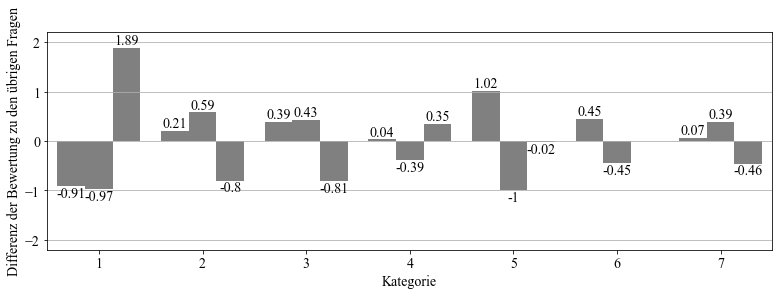

In [27]:
result.RestMean = result.RestMean.round(2)
plt.figure(figsize=(13, 4))
ax = sns.barplot(data=result, x="Kategorie", y="RestMean", hue="FrageNummer", palette=["gray", "gray", "gray"]) 
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(-2.2, 2.2)
plt.ylabel(r"Differenz der Bewertung zu den übrigen Fragen")
plt.legend([],[], frameon=False)
plt.grid(axis="y")
plt.savefig("plots/abbildung_28.png", dpi=320)

# Abbilding 29

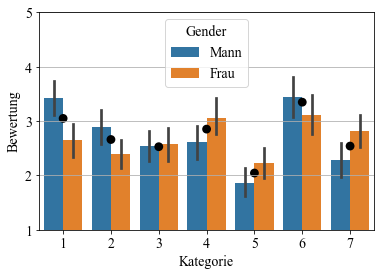

In [28]:
sns.barplot(data=df, x="Kategorie", y="Antwort", hue="Gender")
sns.pointplot(data=df, x="Kategorie", y="Antwort", color="black", join=False, ci=None)
plt.ylim(1, 5)
plt.ylabel("Bewertung")
# plt.yticks(range(1, 6), range(1, 6))
plt.grid(axis="y")
plt.savefig("plots/abbildung_29.png", dpi=320)

# Abbildung 30

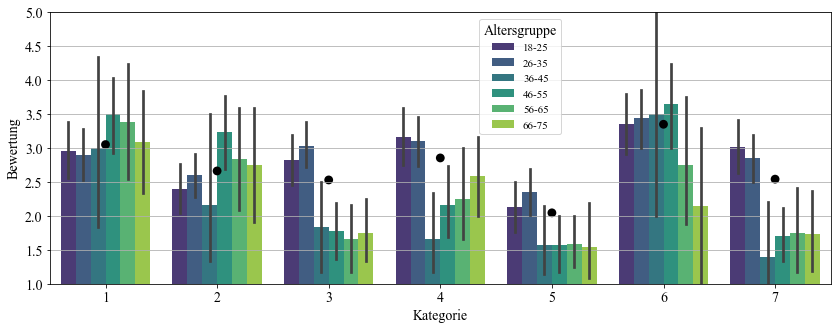

In [29]:
plt.figure(figsize=(14, 5))
sns.barplot(data=df, x="Kategorie", y="Antwort", hue="Altersgruppe", palette="viridis")
sns.pointplot(data=df, x="Kategorie", y="Antwort", color="black", join=False, ci=None)
plt.ylim(1, 5)
plt.ylabel("Bewertung")
plt.legend(title="Altersgruppe", loc=(0.55, 0.55), prop={"size": 11})
# plt.yticks(range(1, 6), range(1, 6))
plt.grid(axis="y")
plt.savefig("plots/abbildung_30.png", dpi=320)

# Abbildung 31

In [30]:
result = defaultdict(list)

grouped = df.groupby(["Kategorie", "Altersgruppe"], as_index=False).mean()
for _, row in grouped.iterrows():
    
    rest = grouped[(grouped.Kategorie == row.Kategorie) & (grouped.Altersgruppe != row.Altersgruppe)]
    
    rest_mean = rest.Antwort.mean()
    
    result["Frage"].append(int(row.Frage))
    result["Altersgruppe"].append(row.Altersgruppe)
    result["Kategorie"].append(int(row.Kategorie))
    result["Antwort"].append(row.Antwort)
    result["RestMean"].append(row.Antwort - rest_mean)
    

result = pd.DataFrame(result)

In [31]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
    ax -- The matplotlib object containing the axes of the plot to annotate.
    spacing -- The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for container in ax.containers:
        for rect in container.patches:
            # Get the height of the bar
            height = rect.get_height()
            # Determine the label to display
            label = f"{height:.2f}"
            # Set the position of the label based on the sign of the value
            if height >= 0:
                label_position = height + spacing
                va = 'bottom'
            else:
                label_position = height - spacing
                va = 'top'
            # Add the label to the plot
            ax.annotate(label,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, label_position),
                        textcoords="offset points",
                        ha='center',
                        va=va,
                        rotation=90)


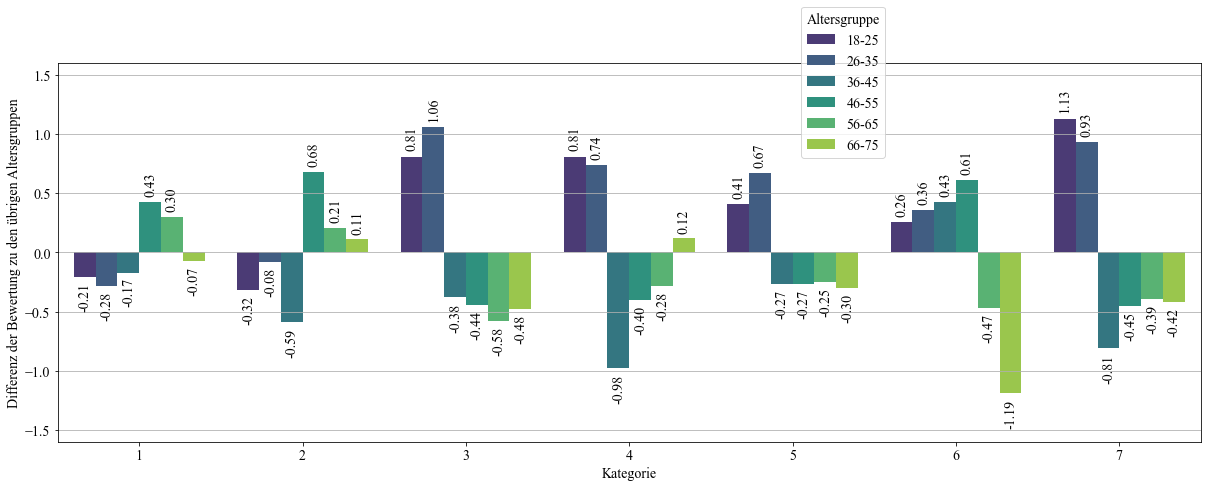

In [33]:
result.RestMean = result.RestMean.round(2)
plt.figure(figsize=(17, 7))
ax = sns.barplot(data=result, x="Kategorie", y="RestMean", hue="Altersgruppe", palette="viridis")
add_value_labels(ax)
plt.legend(title="Altersgruppe", loc=(0.65, 0.75))
plt.ylim(-1.6, 1.6)
plt.ylabel("Differenz der Bewertung zu den übrigen Altersgruppen")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("plots/abbildung_31.png", dpi=320)